# Récupération des données

In [1]:
import pandas
import matplotlib
import matplotlib.pyplot as plt
import numpy
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm
import xgboost as xgb
%matplotlib inline
pandas.set_option('display.width', 100)
pandas.set_option('precision', 3)

In [2]:
Y_train = numpy.load('Y_train.npy')

In [3]:
X_train = numpy.load('X_train.npy')

## Remise en forme des données

In [4]:
print(X_train.shape)
print(Y_train.shape)

(2062, 64, 64)
(2062, 10)


In [5]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_train.shape

(2062, 4096)

In [6]:
Y_train[:5]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [7]:
Y_output = []
for line in range(len(Y_train)):
    for col in range(10):
        value = str(int(Y_train[line][col]))
        if value == '1':
            Y_output += [str(col)]

Y_output[:5]

['0', '0', '0', '0', '0']

## Train / Val Split

In [8]:
X_train, x_val, Y_train, y_val = train_test_split(X_train, Y_output, test_size=0.2, random_state=15)

In [9]:
print(X_train.shape)
print(len(Y_train))
print(x_val.shape)
print(len(y_val))

(1649, 4096)
1649
(413, 4096)
413


# Génération de différents modèles SVM

## Distribution des modalités du set de validation

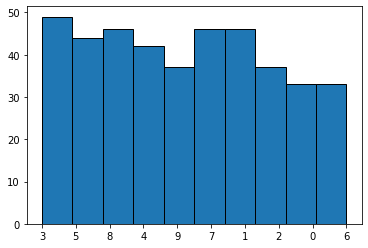

In [10]:
plt.hist(y_val,edgecolor = 'black');

In [11]:
models = (svm.SVC(kernel='linear'),
          svm.LinearSVC(),
          svm.SVC(kernel='rbf'),
          svm.SVC(kernel='poly', degree=3))
          
models = [model.fit(X_train, Y_train) for model in models]

/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## Génération des prédictions

In [12]:
y_predicts = [model.predict(x_val) for model in models]

## Evaluation des modèles

In [13]:
reports = [metrics.classification_report(y_val, y_predict) for y_predict in y_predicts]

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [14]:
[print(report) for report in reports];

              precision    recall  f1-score   support

           0       0.79      0.82      0.81        33
           1       0.92      0.96      0.94        46
           2       0.64      0.78      0.71        37
           3       0.80      0.71      0.75        49
           4       0.90      0.83      0.86        42
           5       0.84      0.82      0.83        44
           6       0.53      0.64      0.58        33
           7       0.95      0.91      0.93        46
           8       0.87      0.74      0.80        46
           9       0.86      0.86      0.86        37

    accuracy                           0.81       413
   macro avg       0.81      0.81      0.81       413
weighted avg       0.82      0.81      0.81       413

              precision    recall  f1-score   support

           0       0.76      0.79      0.78        33
           1       0.85      0.85      0.85        46
           2       0.51      0.51      0.51        37
           3       0.66 

[[27  0  0  0  0  3  1  0  1  2]
 [ 0 44  0  0  1  1  0  1  1  0]
 [ 1  0 29  2  3  0  6  0  3  1]
 [ 0  0  0 35  0  2  2  0  4  1]
 [ 0  0  1  0 35  0  0  1  1  1]
 [ 2  0  1  0  1 36  3  0  0  0]
 [ 0  2  5 10  1  1 21  0  0  0]
 [ 0  0  0  0  0  0  0 42  2  0]
 [ 0  0  1  2  1  0  0  1 34  0]
 [ 3  0  0  0  0  1  0  1  0 32]]


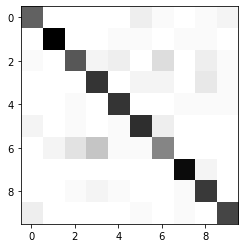

In [15]:
conf_matrix = metrics.confusion_matrix(y_predicts[0], y_val)
print(conf_matrix)
plt.imshow(conf_matrix, cmap='binary');

# Modèle xgboost

In [16]:
model = xgb.XGBClassifier()
model.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

## Génération des prédictions

In [17]:
y_predict = model.predict(x_val)
print(metrics.classification_report(y_val, y_predict))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        33
           1       0.95      0.87      0.91        46
           2       0.71      0.65      0.68        37
           3       0.63      0.63      0.63        49
           4       0.81      0.81      0.81        42
           5       0.79      0.75      0.77        44
           6       0.57      0.85      0.68        33
           7       0.92      0.74      0.82        46
           8       0.59      0.63      0.61        46
           9       0.92      0.89      0.90        37

    accuracy                           0.76       413
   macro avg       0.77      0.77      0.77       413
weighted avg       0.77      0.76      0.76       413



In [18]:
metrics.accuracy_score(y_val, y_predict)

0.7602905569007264

## Evaluation du modèle 

[[28  0  0  0  0  3  0  1  1  0]
 [ 0 40  0  0  2  0  0  0  0  0]
 [ 1  0 24  2  1  1  2  0  3  0]
 [ 1  3  0 31  1  1  2  0 10  0]
 [ 1  0  4  0 34  2  0  1  0  0]
 [ 0  0  1  1  3 33  1  2  1  0]
 [ 1  2  3  9  0  2 28  0  2  2]
 [ 0  0  0  0  0  1  0 34  0  2]
 [ 1  1  5  6  1  1  0  5 29  0]
 [ 0  0  0  0  0  0  0  3  0 33]]


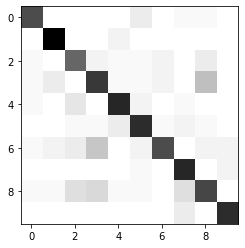

In [19]:
conf_matrix = metrics.confusion_matrix(y_predict, y_val)
print(conf_matrix)
plt.imshow(conf_matrix, cmap='binary');

In [20]:
y_predict

array(['3', '0', '3', '3', '9', '5', '8', '7', '1', '2', '2', '0', '7',
       '2', '9', '2', '3', '6', '9', '5', '4', '8', '6', '2', '1', '6',
       '8', '8', '5', '7', '9', '5', '9', '3', '7', '6', '8', '5', '3',
       '8', '8', '4', '6', '0', '3', '8', '4', '2', '6', '6', '2', '6',
       '8', '6', '8', '2', '8', '1', '1', '8', '3', '2', '1', '0', '1',
       '4', '5', '6', '9', '5', '1', '4', '6', '0', '6', '1', '8', '5',
       '6', '6', '6', '6', '2', '6', '1', '3', '8', '1', '5', '5', '4',
       '5', '7', '9', '8', '5', '0', '9', '4', '7', '4', '3', '6', '6',
       '1', '5', '1', '9', '0', '0', '2', '1', '8', '7', '9', '0', '9',
       '7', '9', '0', '3', '0', '8', '3', '4', '6', '7', '6', '0', '5',
       '3', '7', '4', '5', '0', '0', '4', '5', '5', '9', '7', '3', '5',
       '9', '7', '7', '6', '5', '7', '1', '8', '4', '0', '2', '4', '1',
       '5', '9', '8', '9', '8', '1', '9', '5', '9', '9', '2', '6', '3',
       '7', '8', '3', '7', '8', '7', '3', '7', '5', '8', '1', '1